<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Data Analytics 

### Basic Univariate Statistics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Data Analytics: Basic Univariate Statistics

Here's a demonstration of calculation of univariate statistics in Python. This demonstration is part of the resources that I include for my courses in Spatial / Subsurface Data Analytics and Geostatistics at the Cockrell School of Engineering and Jackson School of Goesciences at the University of Texas at Austin.  

We will cover the following statistics:

#### Measures of Centrality
* Arithmetic Average / Mean
* Median
* Mode (most frequent binned)
* Geometric Mean
* Harmonic Mean
* Power Law Average

#### Measures of Dispersion
* Population Variance
* Sample Variance
* Population Standard Deviation
* Sample Standard Deviation
* Range
* Percentile w. Tail Assumptions
* Interquartile Range

#### Tukey Outlier Test
* Lower Quartile/P25
* Upper Quartile/P75
* Interquartile Range
* Lower Fence
* Upper Fence
* Calculating Outliers

#### Measures of Shape
* Skew
* Excess Kurtosis
* Pearson' Mode Skewness
* Quartile Skew Coefficient

#### Nonparmetric Cumulative Distribution Functions (CDFs)
* plotting a nonparametric CDF
* fitting a parametric distribution and plotting

I have a lecture on these univariate statistics available on [YouTube](https://www.youtube.com/watch?v=wAcbA2cIqec&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=11&t=0s).   

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  The dataset is available on my GitHub account in my GeoDataSets repository at:

* Tabular data - [2D_MV_200wells.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/2D_MV_200wells.csv)

#### Importing Packages

We will need some standard packages. These should have been installed with Anaconda 3.

In [1]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # plotting
import scipy                              # statistics
import statistics as stats                # statistics like the mode
from scipy.stats import norm              # fitting a Gaussian distribution

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). Set this to your working directory, with the above mentioned data file.

In [2]:
#os.chdir("c:/PGE383")                     # set the working directory

#### Loading Data 

Let's load the provided multivariate, spatial dataset.  '2D_MV_200wells.csv' is available at https://github.com/GeostatsGuy/GeoDataSets.  It is a comma delimited file with X and Y coordinates,facies 1 and 2 (1 is sandstone and 2 interbedded sand and mudstone), porosity (fraction), permeability (mDarcy) and acoustic impedance (kg/m2s*10^6). We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).

In [3]:
#df = pd.read_csv("2D_MV_200wells.csv")                      # read a .csv file in as a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/2D_MV_200wells.csv") # read a .csv file in as a DataFrame
#print(df.iloc[0:5,:])                                       # display first 4 samples in the table as a preview
df.head(n=13)                                                   # we could also use this command for a table preview 

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.1700,2.009
1,2585,1185,1,0.1566,6.2750,2.864
2,2065,2865,2,0.1920,92.2970,3.524
3,3575,2655,1,0.1621,9.0480,2.157
4,1835,35,1,0.1766,7.1230,3.979
5,3375,2525,1,0.1239,1.4680,2.337
6,2295,1325,1,0.1790,31.9330,3.491
7,3715,3045,2,0.1914,116.7810,2.187
8,2865,2215,1,0.1763,3.0030,2.048
9,55,1545,1,0.1674,5.2130,2.251


Let's extract one of the features, porosity, into a 1D ndarray and do our statistics on porosity.

* then we can use NumPy's statistics methods

In [4]:
por = df['porosity'].values

Check the output from the above.

In [5]:
print('por is a ' + str(type(por)) + ', with shape of ' + str(por.shape))

por is a <class 'numpy.ndarray'>, with shape of (200,)


Now let's go through all the univariate statistics listed above one-by-one.

#### Measures of Central Tendency

Let's start with measures of central tendency.

##### The Arithmetic Average / Mean

\begin{equation}
\overline{x} = \frac{1}{n}\sum^n_{i=1} x_i
\end{equation}

In [6]:
por_average = np.average(por)
print('Porosity average is ' + str(round(por_average,2)) + '.')

Porosity average is 0.15.


##### Median

\begin{equation}
P50_x = F^{-1}_{x}(0.50)
\end{equation}

In [7]:
por_median = np.median(por)
print('Porosity median is ' + str(round(por_median,2)) + '.')

Porosity median is 0.15.


##### Mode

The most common value. To do this we should bin the data, like into histogram bins/bars.  To do this we will round the data to the 2nd decimal place.  We are assume bin boundaries, $0.01, 0.02,\ldots, 0.30$.

In [8]:
por_mode = stats.mode(np.round(por,2))
print('Porosity mode is ' + str(round(por_mode,2)) + '.')

Porosity mode is 0.14.


##### Geometric Mean

\begin{equation}
\overline{x}_G = ( \prod^n_{i=1} x_i )^{\frac{1}{n}}
\end{equation}

In [9]:
por_geometric = scipy.stats.mstats.gmean(por)
print('Porosity geometric mean is ' + str(round(por_geometric,2)) + '.')

Porosity geometric mean is 0.15.


##### Harmonic Mean

\begin{equation}
\overline{x}_H = \frac{n}{\sum^n_{i=1} \frac{1}{x_i}}
\end{equation}

In [10]:
por_hmean = scipy.stats.mstats.hmean(por)
print('Porosity harmonic mean is ' + str(round(por_hmean,2)) + '.')

Porosity harmonic mean is 0.14.


##### Power Law Average

\begin{equation}
\overline{x}_p = (\frac{1}{n}\sum^n_{i=1}{x_i^{p}})^\frac{1}{p}
\end{equation}


In [11]:
p = 1.0
por_power = np.average(np.power(por,p))**(1/p)
print('Porosity law mean for p = ' + str(p) + ' is ' + str(round(por_power,2)) + '.')

Porosity law mean for p = 1.0 is 0.15.


In [12]:
p = 1.0
np.power(por,p).shape

(200,)

#### Measures of Dispersion

##### Population Variance

\begin{equation}
\sigma^2_{x} = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)
\end{equation}

In [13]:
por_varp = stats.pvariance(por)
print('Porosity population variance is ' + str(round(por_varp,4)) + '.')

Porosity population variance is 0.0011.


##### Sample Variance

\begin{equation}
\sigma^2_{x} = \frac{1}{n-1}\sum^n_{i=1}(x_i - \overline{x})^2
\end{equation}

In [14]:
por_var = stats.variance(por)
print('Porosity sample variance is ' + str(round(por_var,4)) + '.')

Porosity sample variance is 0.0011.


##### Population Standard Deviation

\begin{equation}
\sigma_{x} = \sqrt{ \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^2 }
\end{equation}

In [15]:
por_stdp = stats.pstdev(por)
print('Porosity sample standard deviation is ' + str(round(por_stdp,4)) + '.')

Porosity sample standard deviation is 0.0329.


##### Sample Standard Deviation

\begin{equation}
\sigma_{x} = \sqrt{ \frac{1}{n-1}\sum^n_{i=1}(x_i - \mu)^2 }
\end{equation}

In [16]:
por_std = stats.stdev(por)
print('Porosity sample variance is ' + str(round(por_std,4)) + '.')

Porosity sample variance is 0.0329.


##### Range

\begin{equation}
range_x = P100_x - P00_x
\end{equation}

In [17]:
por_range = np.max(por) - np.min(por)
print('Porosity range is ' + str(round(por_range,2)) + '.')

Porosity range is 0.17.


##### Percentile

\begin{equation}
P(p)_x = F^{-1}_{x}(p)
\end{equation}

In [18]:
p_value = 13
por_percentile = np.percentile(por,p_value)
print('Porosity ' + str(int(p_value)) + 'th percentile is ' + str(round(por_percentile,2)) + '.')

Porosity 13th percentile is 0.11.


In [19]:
np.min(por)

0.05

##### Inter Quartile Range

\begin{equation}
IQR = P(0.75)_x - P(0.25)_x
\end{equation}

In [20]:
por_iqr = scipy.stats.iqr(por)
print('Porosity interquartile range is ' + str(round(por_iqr,2)) + '.')

Porosity interquartile range is 0.04.


#### Tukey Test for Outliers

Let's demonstrate the Tukey test for outliers based on the lower and upper fences.

\begin{equation}
fence_{lower} = P_x(0.25) - 1.5 \times [P_x(0.75) - P_x(0.25)]
\end{equation}

\begin{equation}
fence_{upper} = P_x(0.75) + 1.5 \times [P_x(0.75) - P_x(0.25)]
\end{equation}

Then we declare samples values above the upper fence or below the lower fence as outliers.

In [21]:
p25, p75 = np.percentile(por, [25, 75])
lower_fence = p25 - por_iqr * 1.5
upper_fence = p75 + por_iqr * 1.5
por_outliers = por[np.where((por > upper_fence) | (por < lower_fence))[0]]
print('Porosity outliers by Tukey test include ' + str(por_outliers) + '.')
por_outliers_indices = np.where((por > upper_fence) | (por < lower_fence))[0]
print('Porosity outlier indices by Tukey test are ' + str(por_outliers_indices) + '.')

Porosity outliers by Tukey test include [0.06726 0.05    0.06092].
Porosity outlier indices by Tukey test are [110 152 198].


In [22]:
por[np.where((por > upper_fence) | (por < lower_fence))]

array([0.06726, 0.05   , 0.06092])

In [23]:
por[198]

0.06092

#### Measures of Shape

##### Pearson's Mode Skewness

\begin{equation}
skew = \frac{3 (\overline{x} - mode_x)}{\sigma_x}
\end{equation}

In [24]:
por_skew = (por_average - por_mode)/por_std
print('Porosity skew is ' + str(round(por_skew,2)) + '.')

Porosity skew is 0.28.


##### Population Skew, 3rd Central Moment

\begin{equation}
\gamma_{x} = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^3
\end{equation}

In [28]:
por_cm = scipy.stats.moment(por,moment=3)
print('Porosity 3rd central moment is ' + str(round(por_cm,7)) + '.')

Porosity 3rd central moment is -1.22e-05.


##### Quartile Skew Coefficient

\begin{equation}
QS = \frac{(P75_x - P50_x) - (P50_x - P25_x)}{(P75_x - P25_x)}
\end{equation}

In [29]:
por_qs = ((np.percentile(por,75)-np.percentile(por,50))
          -(np.percentile(por,50)-np.percentile(por,25))) /((np.percentile(por,75))-np.percentile(por,25))
print('Porosity quartile skew coefficient is ' + str(round(por_qs,2)) + '.')

Porosity quartile skew coefficient is 0.14.


#### Plot the Nonparametric CDF

Let's demonstrate plotting a nonparametric cumulative distribution function (CDF) in Python

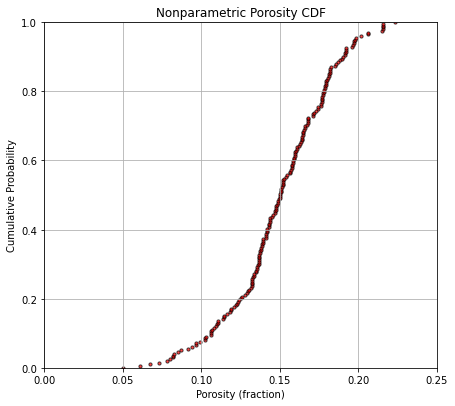

In [33]:
# sort the data:
por_sort = np.sort(por)

# calculate the cumulative probabilities assuming known tails
p = np.arange(len(por)) / (len(por) - 1)

# plot the cumulative probabilities vs. the sorted porosity values
plt.subplot(122)
plt.scatter(por_sort, p, c = 'red', edgecolors = 'black', s = 10, alpha = 0.7)
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.grid(); 
plt.title('Nonparametric Porosity CDF')
plt.ylim([0,1]); plt.xlim([0,0.25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)

#### Fit a Gaussian Distribution

Let's fit a Gaussian distribution

* we get fancy with Maximuum Likelihood Estimation (MLE) for the Gaussian parametric distribution fit mean and standard deviation

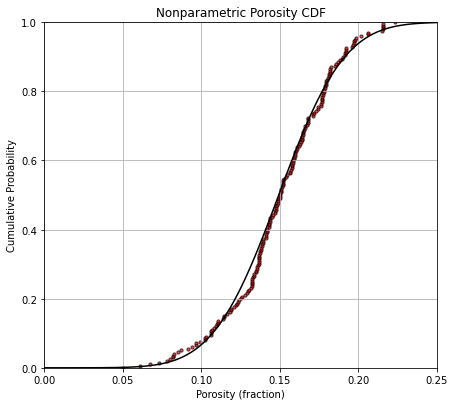

In [34]:
por_values = np.linspace(0.0,0.25,100) 
fit_mean, fit_stdev = norm.fit(por,loc = por_average, scale = por_std) # fit MLE of the distribution 
cumul_p = norm.cdf(por_values, loc = fit_mean, scale = fit_stdev)

# plot the cumulative probabilities vs. the sorted porosity values
plt.subplot(122)
plt.scatter(por_sort, p, c = 'red', edgecolors = 'black', s = 10, alpha = 0.7)
plt.plot(por_values,cumul_p, c = 'black')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.grid(); 
plt.title('Nonparametric Porosity CDF')
plt.ylim([0,1]); plt.xlim([0,0.25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)

#### Comments

This was a basic demonstration of univariate statistics in Python.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at [Python Demos](https://github.com/GeostatsGuy/PythonNumericalDemos) and a Python package for data analytics and geostatistics at [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
